In [1]:
import pandas as pd

# data_field = pd.read_csv("dummy_omni_field.csv", delimiter=";")
data_field = pd.read_csv("modified_data.csv", delimiter=";")
data_field

,lokal_x,lokal_y,pixel_x,pixel_y
0,0,10,200,205
1,10,0,205,200
2,0,-10,200,195
3,-10,0,195,200
4,10,-10,203,197
5,10,10,203,203
6,-10,10,197,203
7,-10,10,197,203
8,0,20,200,205
9,20,0,205,200


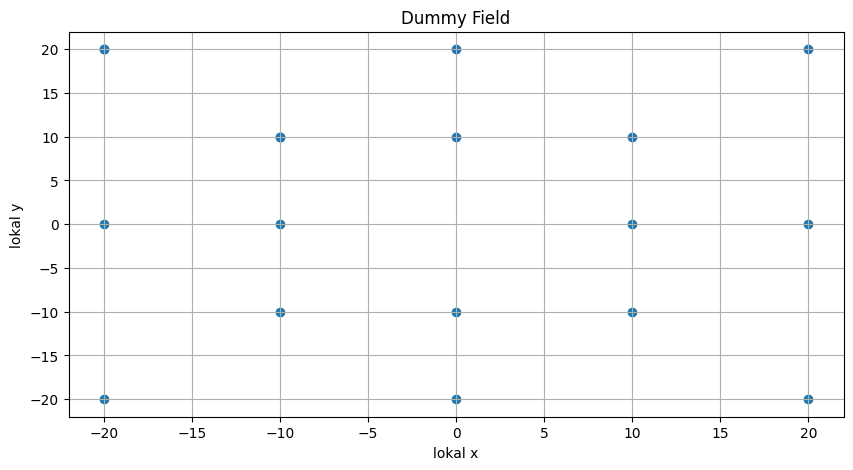

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Dummy Field")
plt.xlabel("lokal x")
plt.ylabel("lokal y")
plt.scatter(data_field['lokal_x'], data_field['lokal_y'])
plt.grid()

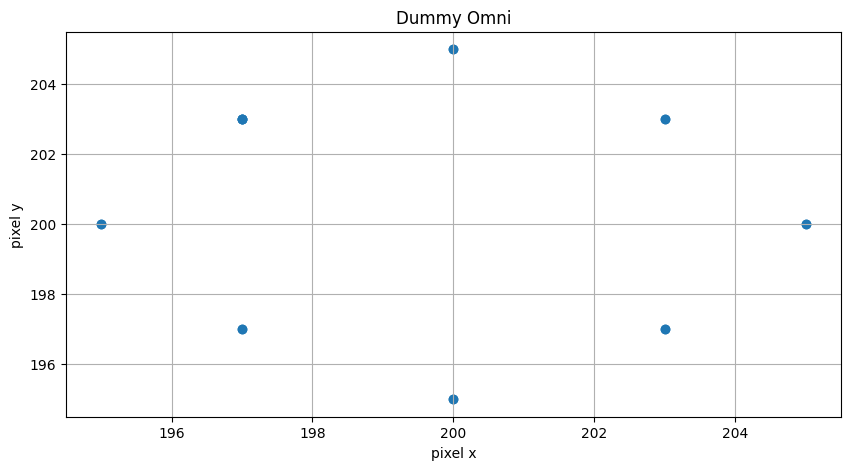

In [3]:
plt.figure(figsize=(10,5))
plt.title("Dummy Omni")
plt.xlabel("pixel x")
plt.ylabel("pixel y")
plt.scatter(data_field['pixel_x'], data_field['pixel_y'])
plt.grid()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

X = data_field[["pixel_x", "pixel_y"]].values
y_x = data_field["lokal_x"].values
y_y = data_field["lokal_y"].values

X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(X, y_x, y_y, test_size=0.1, random_state=42)

# Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rbf_x = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
rbf_y = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

rbf_x.fit(X_train_scaled, y_x_train)
rbf_y.fit(X_train_scaled, y_y_train)

y_x_pred = rbf_x.predict(X_test_scaled)
y_y_pred = rbf_y.predict(X_test_scaled)

# Evaluating
mae_x = mean_absolute_error(y_x_test, y_x_pred)
mae_y = mean_absolute_error(y_y_test, y_y_pred)
r2_x = r2_score(y_x_test, y_x_pred)
r2_y = r2_score(y_y_test, y_y_pred)

print("MAE (x, y):", (mae_x, mae_y), "\nR2 (x, y):", (r2_x, r2_y))


MAE (x, y): (5.000317885199103, 4.999624532567501) 
R2 (x, y): (-0.9605639009236859, -0.9603309526435142)


In [5]:
import numpy as np

# Example test
new_pixel_x = 202
new_pixel_y = 198

new_X = np.array([[new_pixel_x, new_pixel_y]])
new_X_scaled = scaler.transform(new_X)

# Predict lokal_x and lokal_y
predicted_lokal_x = rbf_x.predict(new_X_scaled)[0]
predicted_lokal_y = rbf_y.predict(new_X_scaled)[0]

print(f"Predicted lokal_x: {predicted_lokal_x}")
print(f"Predicted lokal_y: {predicted_lokal_y}")


Predicted lokal_x: 9.39676262568431
Predicted lokal_y: -7.875493324436199
